# Simple Linear Regression

In [1]:
# This will ignore non harmful warnings
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 - Data Ingestion

In [2]:
import pandas as pd
df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


##### Profit ~ RND
PROFT_pred = B0 + B1*RND


Least Square Error Model

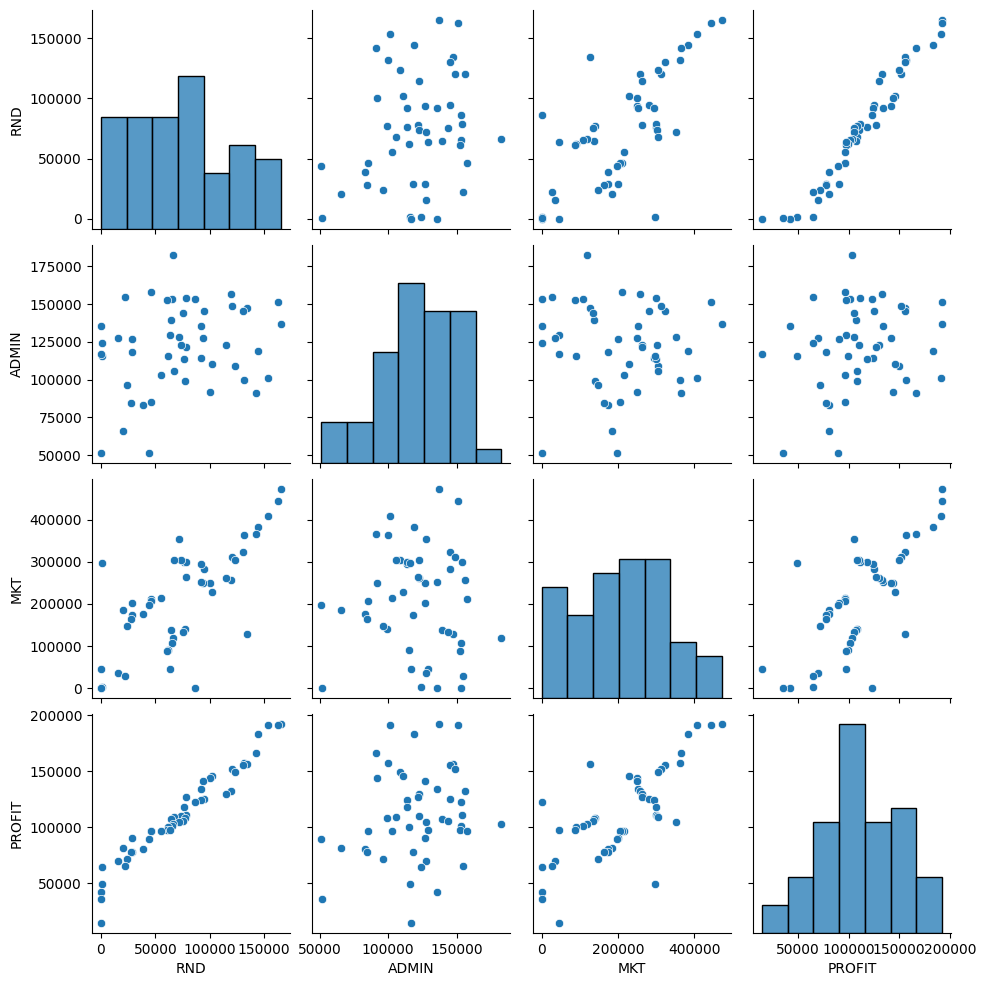

In [3]:
import seaborn as sns
sns.pairplot(df)

### Step 2 - Perform Baseic Data Quality Checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [6]:
# Check data for duplicate rows
df.duplicated().sum()

np.int64(0)

### Seperate X (which is RND) and Y (which is PROFIT)

In [7]:
X = df[["RND"]]
Y = df[["PROFIT"]]

In [8]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [9]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Step 4 - Build Linear Regression Model

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

##### PROFIT = B0 + B1*RND
##### B0 - Intercept
##### B1 - Slope / Coefficient

In [11]:
model.intercept_

array([49032.89914125])

In [12]:
model.coef_

array([[0.85429137]])

### PROFIT_pred = 49032.9 + 0.8542 * RND

If RND increses by 1 unit Profit will increase by 0.8542

If RND budget is 0 the profit is 49032.9 on an average

### Step 5 - Model Evaluation

In [14]:
ypred = model.predict(X)
ypred

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032],
       [161694.19683741],
       [164033.72501421],
       [160345.46724972],
       [152011.33380847],
       [154396.82286103],
       [136096.36397105],
       [135036.08586475],
       [129219.89081021],
       [127621.20411029],
       [151499.37407569],
       [146869.43093301],
       [115678.82583435],
       [129897.69412683],
       [127413.41482014],
       [122860.50313037],
       [114175.91374003],
       [116000.34693472],
       [112245.81324567],
       [106725.35677792],
       [114850.93206678],
       [104275.40289851],
       [113385.70276482],
       [110633.79960036],
       [105460.14271464],
       [105079.09459155],
       [101994.24845109],
       [101261.18102569],
       [103202.54108032],
       [ 96440.90176556],
       [ 88694.29012885],
       [ 88342.27936946],
       [ 73520.10196791],
       [ 86681.47714396],
       [ 663

In [15]:
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [16]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [17]:
from sklearn.metrics import (
   root_mean_squared_error,
   mean_absolute_error,
   mean_absolute_percentage_error,
   r2_score
)

In [18]:
def evaluate_model(model, x, y):
   ypred = model.predict(x)

   # Evaluate all metrics
   rmse = root_mean_squared_error(y, ypred)
   mae = mean_absolute_error(y, ypred)
   mape = mean_absolute_percentage_error(y, ypred)
   r2 = r2_score(y, ypred)

   # Print all values
   print(f"RMSE = {rmse:.2f}")
   print(f"MAE = {mae:.2f}")
   print(f"MAPE = {mape:.2%}")
   print(f"R2 score = {r2:.2%}")

In [19]:
evaluate_model(model, X, Y)

RMSE = 9226.10
MAE = 6910.98
MAPE = 11.07%
R2 score = 94.65%


### From above R2 score > 80% hence model is good
##### Visualizing straight line fit

<Axes: xlabel='RND', ylabel='PROFIT'>

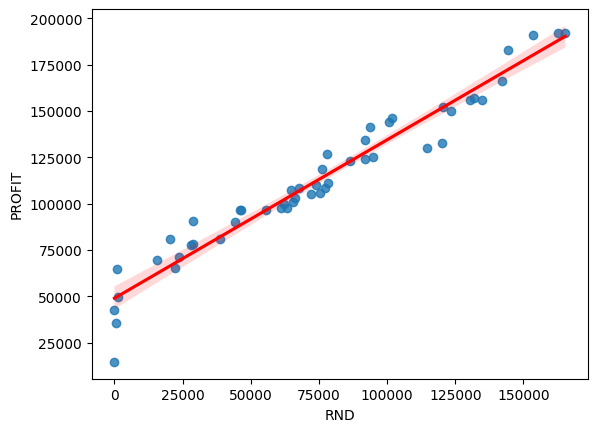

In [20]:
sns.regplot(data = df, x="RND", y="PROFIT", line_kws={"color":"red"})

### Step 5: Out of Sample Prediction

In [23]:
X.values[0:5]

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34]])

In [24]:
rnd = 30_000
pred = model.predict([[rnd]])
pred

array([[74661.64026942]])